# Chapter 1: Introduction to Clustering - Tested and Verified

## Exercise 1.04 - 1.05

## General Feedback
1. Decide on the indentation and keep it that way
2. Make comments
3. Define Goal for the exercise and each module.

In [1]:
# Tested And Verified
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
#Fix the seed to have the reproducible results.
np.random.seed(20)

In [3]:
# Tested And Verified
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, random_state=800)
centroids = [[-6,2],[3,-4],[-5,10]]

In [4]:
X

array([[-3.83458347,  6.09210705],
       [-4.62571831,  5.54296865],
       [-2.87807159, -7.48754592],
       ...,
       [-3.709726  , -7.77993633],
       [-8.44553266, -1.83519866],
       [-4.68308431,  6.91780744]])

In [5]:
y

array([2, 2, 1, ..., 1, 0, 2])

In [6]:
centroids

[[-6, 2], [3, -4], [-5, 10]]

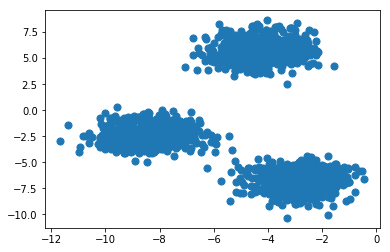

In [8]:
# Tested And Verified
# We dont need this
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='tab20b')
plt.show()

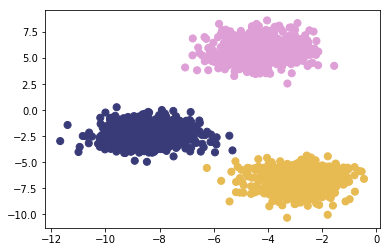

In [7]:
# Tested And Verified
plt.scatter(X[:, 0], X[:, 1], c=y,s=50, cmap='tab20b')
plt.show()

In [9]:
# Tested And Verified
def dist(a, b):
    return math.sqrt(math.pow(a[0]-b[0],2) + math.pow(a[1]-b[1],2))

In [10]:
from scipy.spatial.distance import cdist

In [11]:
X[105:110]

array([[-3.09897933,  4.79407445],
       [-3.37295914, -7.36901393],
       [-3.372895  ,  5.10433846],
       [-5.90267987, -3.28352194],
       [-3.52067739,  7.7841276 ]])

In [12]:
# Tested And Verified
# Please specify the need for this snippet in simple terms, what we meant by cluster membership.
for x in X[105:110]:
    calcs = []
    for c in centroids:
        calcs.append(dist(x, c))
    print(calcs, "Cluster Membership: ", np.argmin(calcs, axis=0))

[4.027750355981394, 10.70202290628413, 5.542160268055164] Cluster Membership:  0
[9.73035280174993, 7.208665829113462, 17.44505393393603] Cluster Membership:  1
[4.066767506545852, 11.113179986633003, 5.1589701124301515] Cluster Membership:  0
[5.284418164665783, 8.931464028407861, 13.314157359115697] Cluster Membership:  0
[6.293105164930943, 13.467921029846712, 2.664298385076878] Cluster Membership:  2


##### Fix Indentation; An advice use Spyder's static code analysis before committing the code.

In [13]:
# Tested And Verified
def k_means(X, K):
    # Keep track of history so you can see K-means in action
    centroids_history = []
    labels_history = []
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    while True:
    # Euclidean distances are calculated for each point relative to centroids, and then np.argmin returns
    # the index location of the minimal distance which cluster a point is assigned to.
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
        # Take mean of points within clusters to find new centroids:
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(K)])
        centroids_history.append(new_centroids)
        # If old centroids and new centroids no longer change, K-means is complete and end. Otherwise continue
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels, centroids_history, labels_history

In [14]:
centers, labels, centers_hist, labels_hist = k_means(X, 3)

##### Output is not matching; history = zip(centers_hist, labels_hist) is not present in the document
Fix a seed for randomness to avoid this issue

In [16]:
history = zip(centers_hist, labels_hist)

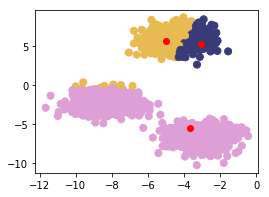

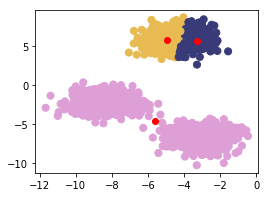

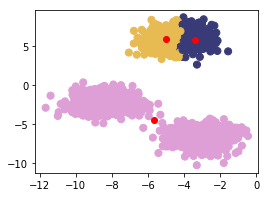

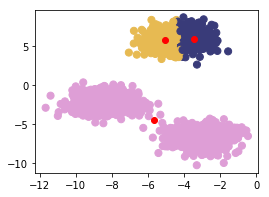

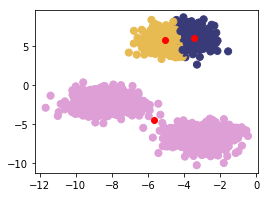

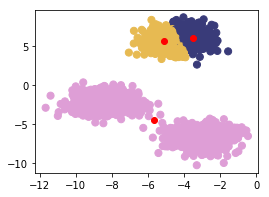

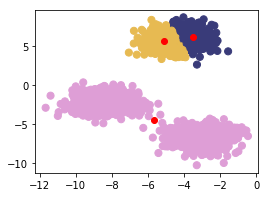

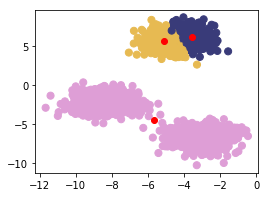

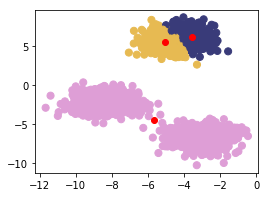

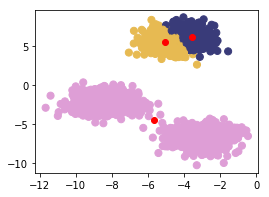

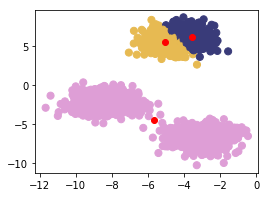

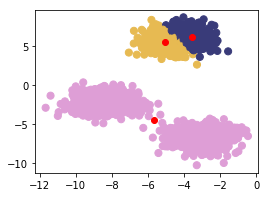

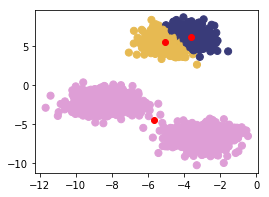

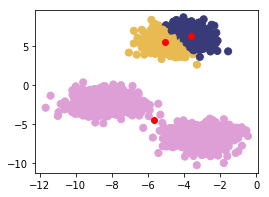

In [17]:
# Tested And Verified
# Add comment
for x, y in history:
    plt.figure(figsize=(4,3))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20b')
    plt.scatter(x[:, 0], x[:, 1], c='red')
    plt.show()